In [1]:
%%html
<style>

.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}

</style>

In [2]:
from vpython import *

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Reasoning in Small Time Steps

## Aaron Titus, High Point University

### Appalachian State University, Department of Physics, Nov. 16, 2018

## Abstract

Numerical techniques for integration are hardly taught in a typical calculus course and are hardly used in a typical physics course. Yet, numerical integration is an essential tool in current research and development in science and engineering. How do we bridge this gap between what modern students need and what we traditionally teach? The answer is to think iteratively. I will present examples across the physics curriculum using VPython (or the web-based version, GlowScript) which provides 3D visualization and a low barrier to learning numerical methods.

# "Education is not the filling of a pail, but the lighting of a fire."

<img src="chile.jpg" align="right" width="800">

### -- paraphrase of Plutarch, *On Listening to Lectures*

(photo credit: Brad Barlow)


## Acknowledgements

1. My colleagues at High Point University: Briana Fiser, Brad Barlow, Jeff Regester, Jarrett Lancaster, and Martin DeWitt
2. Ruth Chabay and Bruce Sherwood (University of North Texas)
3. Larry Martin, Bob Beichner, John Risley (NCSU) and Wolfgang Christian, Mario Belloni (Davidson College) and Paco Esquembre (Universidad de Murcia)
4. Josh Gates, Frank Noschese (HS) and Steve Spicklemire (University of Indianapolis)
5. Tom Dooling, UNC Pembroke
6. SPS, AAPT, and NCS-AAPT

# 2003 -- My first year teaching with *Matter and Interactions* (first edition)

<img src="mande-1e.jpg" width=900>


### c. 1990 -- M&I before the first edition

- 1990: Chabay and Sherwood teach intro E&M at Carnegie Mellon <img src="ballspring.gif" width=500 align="right">
- 1995: Introductory E&M textbook/workbook published by Wiley
- 1997: Chabay and Sherwood start teaching introductory mechanics
- 1997: Students write cT programs for numerical computation
- 2000: Abandon cT and develop VPython (started by student, David Scherer)
- 2002: Publication of the 1st edition of Volume I (Modern Mechanics) and Volume 2 (Electric and Magnetic Interactions)

### 1983 -- M.U.P.P.E.T.

[Student Programming in the Introductory Physics Course: M.U.P.P.E.T](https://aapt.scitation.org/doi/abs/10.1119/1.17295?journalCode=ajp), E. F. Redish, and J. M. Wilson, *American Journal of Physics*, **61**, 222 (1993).

**Abstract**

Since **1983**, the Maryland University Project in Physics and Educational Technology (M.U.P.P.E.T.) has been investigating the implication of including **student programming in an introductory physics course for physics majors. Many significant changes can result. One can rearrange some content to be more physically appropriate, include more realistic problems, and introduce some contemporary topics**. We also find that one can begin **training the student in professional research-related skills at an earlier stage than is traditional**. We learned that the inclusion of carefully considered computer content requires an increased emphasis on qualitative and analytic thinking.

### 1981 -- Cromer's AJP Paper on the Euler Approximation

Alan Cromer, "Stable solutions using the Euler approximation," *Am. J. Phys.* **49**, 455-459 (1981)


<img src="cromer-quote.png" align="center" width=800>

### 1981 -- Cromer's Conclusion

The concluding sentence in Cromer's 1981 AJP paper is:

<div class="alert alert-success" role="alert">
With such an elegant tool at our disposal, the three-body problem may become as much a part of the introductory physics curriculum as the inclined plane.
</div>

# Presentation Outline

<div class="alert alert-info" role="alert">Benefits of iterative thinking in introductory physics for physical reasoning, with examples.</div>

1. Describing (or predicting) the motion of a system.
2. Describing (or predicting) the polarization of a metal.


# Predicting Motion

### Euler Cromer Method

1. Calculate the net force on the particle.
2. Update the particle's momentum.
3. Update the particle's position.

For non-relativistic motion,

$$\vec{v}_{avg}\approx \vec{v}_f \approx \frac{\vec{p}}{m}.$$

For an object named __particle__, the VPython code looks like this. (`Fnet`, `p`, and `particle.pos` are vector objects. Operator overloading in VPython allows Python to add and subtract vectors and multiply and divide a vector by a scalar.)

```python
    Fnet = #vector(0,-mg,0) for example
    p = p + Fnet * dt
    particle.pos = particle.pos + p/m * dt
```

## Example -- Orbit

[03-earth-orbit-steps.py](http://www.glowscript.org/#/user/Aaron_Titus/folder/mandi-v1-private/program/03-earth-orbit-steps) by Ruth Chabay (*Matter and Interactions*)

In [10]:
scene=canvas(title="Moon Voyage")

scene.width = 1000
#scene.height = 600

scene.background=color.white

earth = sphere(pos=vector(0,0,0), radius=6.4e6, color=color.blue)
sc = sphere(pos=vector(-10*earth.radius, 0,0), radius=1e6, color=color.magenta, make_trail=True)
moon = sphere(pos=vector(4e8,0,0), radius=1.75e6, color=color.black)

G = 6.7e-11 #gravitational constant

earth.m = 6e24 #kg
sc.m = 15e3 #kg
moon.m = 7e22

sc.v = vector(0,3.27e3,0) #m/s
sc.p = sc.m*sc.v

t=0
dt = 5 #s

scene.autoscale = False #turn off zooming
scene.center = (earth.pos + moon.pos)/2

scene.waitfor("click")

while t < 0.075*365*24*60*60:
    rate(1e4)
    
    #compute gravitational force by Earth on the spacecraft
    r = sc.pos - earth.pos
    rmag = mag(r)
    rhat = r/rmag
    Fgravearth = -G*sc.m*earth.m/rmag**2*rhat

    #compute gravitational force by Moon on the spacecraft
    r = sc.pos - moon.pos
    rmag = mag(r)
    rhat = r/rmag
    Fgravmoon = -G*sc.m*moon.m/rmag**2*rhat
    
    #calculate net force
    Fnet=Fgravearth+Fgravmoon

    #update momentum and compute velocity of the spacecraft
    sc.p = sc.p + Fnet*dt
    sc.v = sc.p/sc.m
    sc.pos = sc.pos + sc.v*dt
    
    t = t+dt
    
    if rmag < earth.radius:
     break  ## exit from the loop
 
 

<IPython.core.display.Javascript object>

# How We Model the World

### from Bob Panoff, Shodor



$$\mbox{Right Answer} = \mbox{Wrong Answer} + \mbox{Corrections}$$

$$\mbox{Right Answer} = \mbox{Wrong Answer}\left(1+\frac{\mbox{Corrections}}{\mbox{Wrong Answer}} \right)$$

## Example -- Spring Released from Uniform Circular Motion

The free end of a spring released from uniform circular motion should continue in uniform circular motion after it is released until a wave reaches the end of the spring.

Matthew Carnaghi ('16), Tom Dooling from UNC Pembroke, and Jeff Regester and Aaron Titus from High Point University

ERROR! Session/line number was not unique in database. History logging moved to new session 631


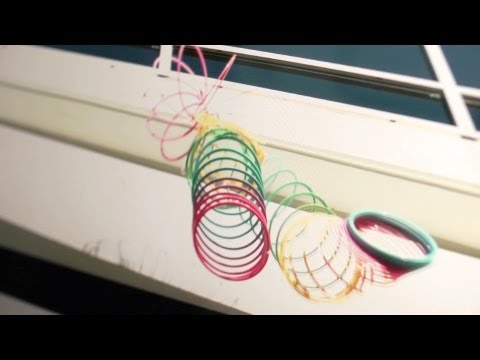

In [3]:
#https://youtu.be/uiyMuHuCFo4
from IPython.display import YouTubeVideo
YouTubeVideo('uiyMuHuCFo4')

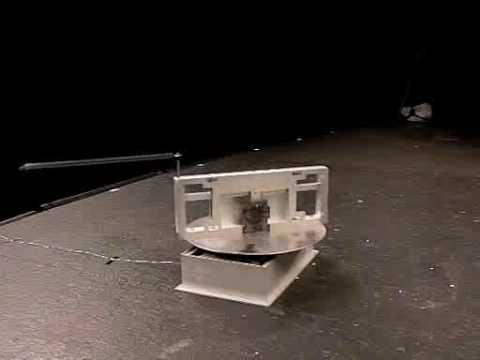

In [4]:
#https://youtu.be/LlgFhRs1NYU
from IPython.display import YouTubeVideo
YouTubeVideo('LlgFhRs1NYU')

## Quasi-Static Condition

### Unstretched

<img src="restspring.jpg" align="center" width="600">

### Rotating Coordinate System

<img src="stretchspring.jpg" align="center" width="600">

Newton's Second Law for the $i^{th}$ ball is

$$\frac{dp_r}{dt}=+k(r_{i+1}-r_i)-k(r_i-r_{i-1}) + m\omega^2 r_i \qquad.$$

In the steady-state, this leads to the following differential equation for the displacement of a point on the spring.

$$\frac{d^2u}{dx^2}=-\frac{M\omega^2}{KL_o^2}(u + x + r_o)$$

Now, define $\frac{M\omega^2}{KL_o^2}=\alpha^2$. The solution for the stretched position $r$ of a point on the spring initially at position $x$ is

$$r=\frac{r_o}{cos(\phi)}\cos(\alpha x +\phi)$$

where

$$\tan(\phi)= \frac{\left(-1/(r_o \alpha)-\sin(\alpha L_o)\right)}{\cos(\alpha L_o)} \qquad .$$

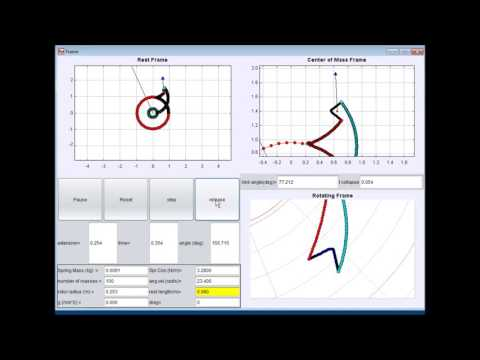

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('BvROdwDoW44')

## Dynamic Condition

<img src="generalspring.jpg" align="center" width="600">

$$
k(|\vec{r}_+|-\Delta x)\hat{r}_++k(|\vec{r}_-|-\Delta x)\hat{r}_-+m\omega^2\vec{r}_i-2m\vec{\omega}\times\vec{v_i}=m\ddot{\vec{r}}_i
$$

where,

$$\vec{r}_+=\vec{r}_{i+1}-\vec{r}_i=\langle (x_{i+1}-x_i), (y_{i+1}-y_i)\rangle$$

and

$$\vec{r}_-=\vec{r}_{i-1}-\vec{r}_i=\langle (x_{i-1}-x_i), (y_{i-1}-y_i)\rangle$$

The quantity $\Delta x$ is the rest length between adjacent masses in the ball-spring model.

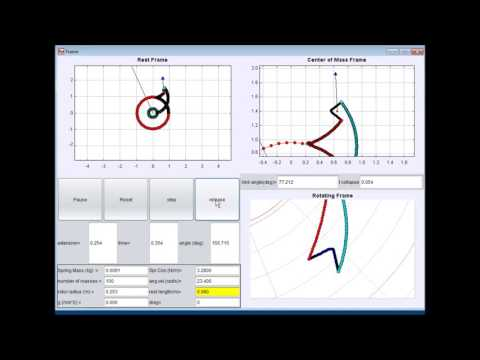

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('BvROdwDoW44')

## Include Drag and Gravity

If you swing a slinky in a horizontal plane, your hand leads the outer edge of the slinky. And the slinky hangs downward.

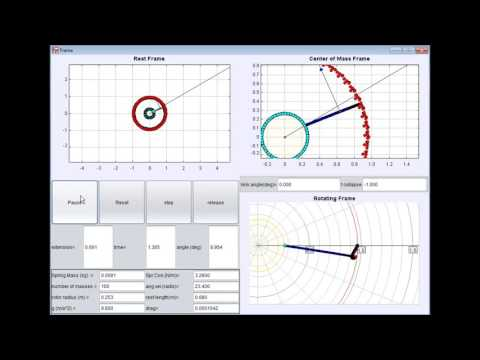

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('tlfaKQqFpcA')

<img src="ajp.jpg" width=400>

# E&M

## Superposition

The net electric field at a location in space is the vector sum of the individual electric fields contributed by all charged particles located elsewhere. The electric field contributed by a charged particle is unaffected by the presence of other charged particles.

$$\vec{E}_{net} = \sum_{i=1}^N \vec{E}_i = \sum_{i=1}^N \frac{1}{4\pi \varepsilon_0}\frac{q_i}{r_i^2}\hat{r}_i$$

# Polarization of a Metal

## Question

A uniformly charged sphere $(+Q)$ is in space. At $(t=0)$, we suddenly introduce a neutral metal block shown below. Location A is a point inside the block and location B is outside the block. 


<img src="charge-and-block-00.png" width=800 align="center">


After a long time ("long" is a relative term meaning that there is plenty of time for the system to reach static equilibrium), the electric field at location B is

1. zero
2. less than the electric field before the block was placed there.
3. equal to the electric field before the block was placed there.
4. greater than the electric field before the block was placed there.

## t=0

1. The electric field due to the spere at location A is to the right. 

  <img src="charge-and-block-t=0a.png" width=800 align="center">


2. The force on an electron is to the left.
3. Mobile electrons at location A move to the left. Electrons in the right side of the block also move to the left.
4. There are excess electrons on the left side of the block and excess positive charge on the right side.

  <img src="charge-and-block-t=0b.png" width=800 align="center">



## $t=1\Delta t$

1. The surface charge creates an electric field at location A that is to the left. This reduces the net electric field. The same thing happens at the right side of the block.

    <img src="charge-and-block-t=1a.png" width=800 align="center">
  
    <img src="charge-and-block-t=1b.png" width=800 align="center">

2. The force on mobile electrons on both the left side of the block and right side of the block is to the left.
3. Mobile electrons move to the left.
4. More electrons build up on the left side and more positive charge builds up on the right side.

    <img src="charge-and-block-t=1c.png" width=800 align="center">


## After a long time

1. After a long time, the net electric field at each location inside the block is zero. Mobile electrons move until the surface charge creates an electric field that is equal in magnitude and opposite in direction to the sphere's electric field. When this occurs, mobile electrons at that location will no longer move. The block will be in static equilibrium.

  <img src="charge-and-block-t=1d.png" width=800 align="center">


2. There is more charge on the left side of the block than the right side of the block because the applied electric field is larger on the left side than the right side. There must be surface charge spread out along the sides of the block as well.



## What happened to the net electric field at B?

The electric field at location B is the sum of the electric field due to the sphere and the electric field due to surface charge on the block. The charge on the right side of the block dominates, so the electric field at B due to surface charge is to the right, in the same direction as the electric field due to the sphere. Thus, the answer to the original question is (4), the net electric field at B is *greater* due to the presence of the metal block.

  <img src="charge-and-block-ans.png" width=800 align="center">

## Does a metal "block" electric field?

The metal did NOT "block" the field. Rather, it increased it!

## Simulation

[Simulation of a polarized conductor](http://www.glowscript.org/#/user/matterandinteractions/folder/matterandinteractions/program/18-SurfaceCharge) by Bruce Sherwood



<IPython.core.display.Javascript object>


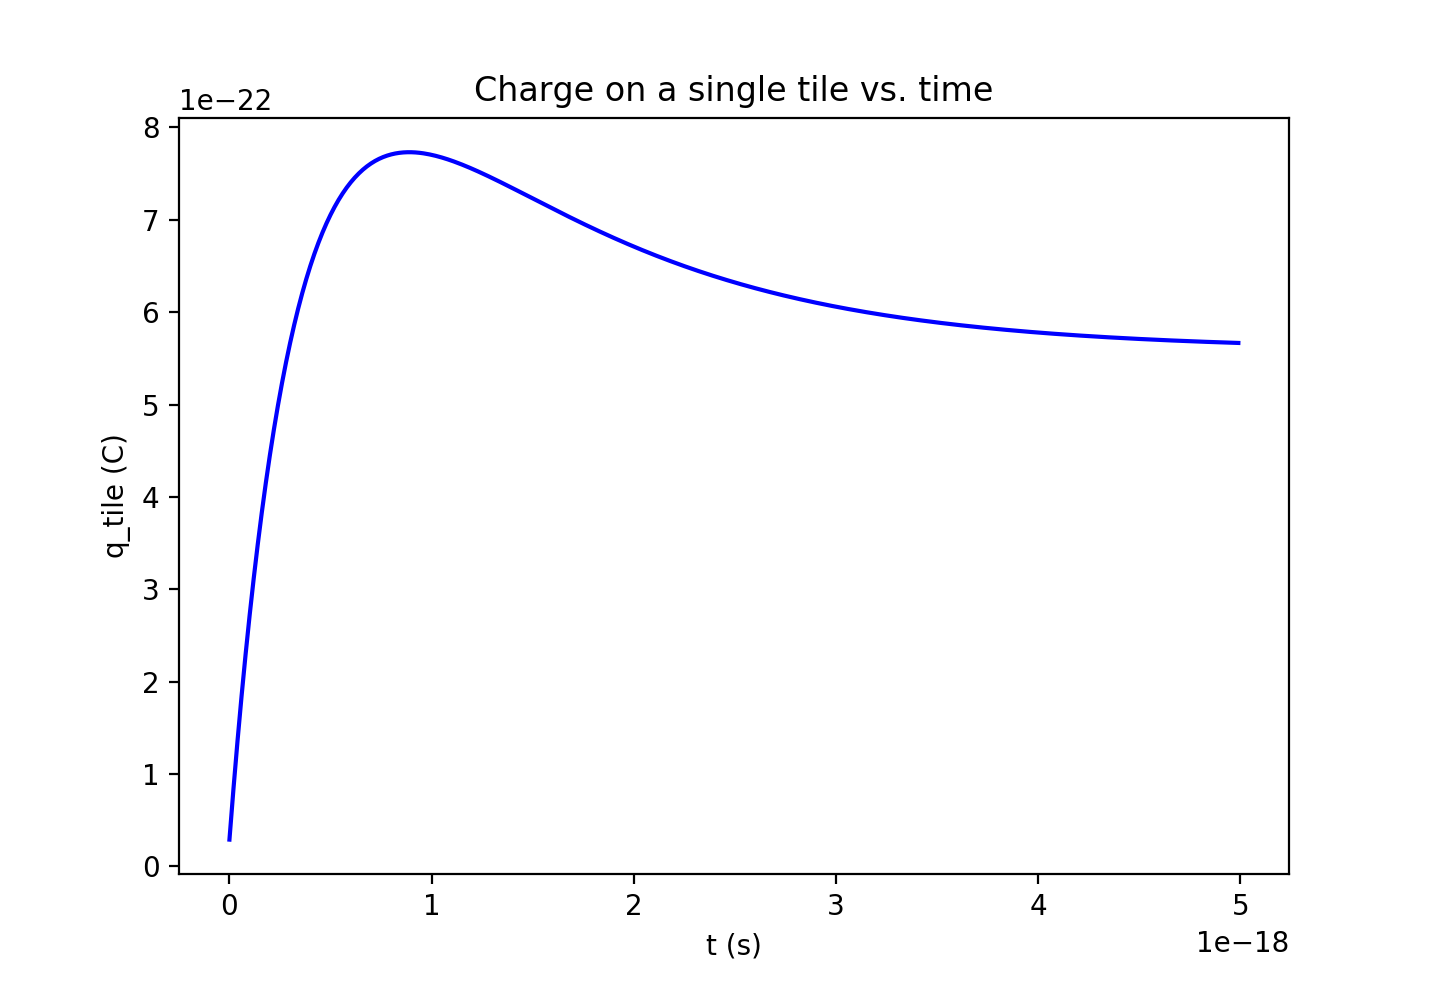

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_table('tilechargepy.txt')

fig1 = plt.figure()
plt.title('Charge on a single tile vs. time')
plt.xlabel('t (s)')
plt.ylabel('q_tile (C)')
plt.plot(df['t (s)'],df['q (C)'],'b-')
plt.show()

## Field Mill

An electric field mill is an apparatus used to measure electric field strength. It can be used to predict lightning strikes. It can also be used aboard rockets to measure electric field between earth and storm clouds, for example.

### Description

Here is [a description of a field mill](http://www.missioninstruments.com/pages/learning/about_fm3.html). It says:

> The process of exposing (charging) and shielding (discharging) the sensor plate from the electrical field is accomplished by means of a rotary shutter (see Figure 5. Rotary Shutter.), consisting of a motor-driven, mechanically complementary rotor/stator pair. As the motor rotates, the shutter alternately opens (see Figure 6.) to allow the external electric field to charge the sensor plate, and then closes (see Figure 7.) to shield the sensor plate to allow it to discharge, or reset, in preparation for the next measurement. The shutter rotates at a speed of 1650 revolutions per minute, and opens and closes four times per revolution thus producing 6,600 samples per minute.

<img src="field-mill-02.jpg" width=500 align="center">

<img src="field-mill-03.jpg" width=500 align="center">

<img src="field-mill-01.jpg" width=500 align="center">


## Do Conductors Block Electric Field?

The above description and figures indicate that the rotating shutter altnerately blocks the electric field (when closed) and allows it to pass through when it is open.

Is this a correct description?  Can a metal block electric field, meaning that the electric field is non-zero on one side of the metal and zero on the other side of the metal?

Let's think iteratively to answer this question!


## How can a conductor block an electric field?

Go to [this simulation](http://www.glowscript.org/#/user/matterandinteractions/folder/matterandinteractions/program/18-SurfaceCharge) by Bruce Sherwood. Select the option `"Grounded" metal object` from the menu.

# Calculating Surface Charge on the Polarized Block

For the simulation of the polarized block, the block is covered in 16,000 tiles. (40 x 40 on the ends and 40 x 80 on the sides.)

It takes **13 minutes (796 seconds)** for the block to reach equilibrium (500 iterations).

## Why Did It Take So Long?

**16,000 tiles**

For each tile:

- compute the electric field due to the source and 15,999 other tiles

$$\vec{E}_{i,j}=\frac{1}{4\pi \varepsilon_0}\frac{q_iq_j}{|\vec{r}|^2}\hat{r} \qquad \vec{r}=\vec{r}_i-\vec{r}_j$$

That's a total of 256,000,000 calculations.



- calculate the change in charge due to current in a small time step $\Delta t$

$$\Delta q_i = \sigma A E_{net,\perp}\Delta t$$

That's 16,000 more calculations.

- find the new charge on each tile

$$q_i=q_i+\Delta q_i$$

That's 16,000 more calculations...

...for a total of **256,032,000** calculations...

...for **500 iterations** of this process to reach equilibrium...

That's **128,016,000,000** calculations, and that's why it took so long.

## What Can We Do About It?

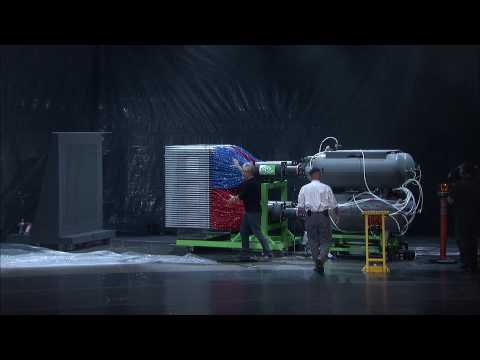

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo('-P28LKWTzrI')

## CUDA

<img src="nvidia.jpg" width=600 align="center">

<img src="ProgramRunTime.jpg" width=800 align="center">

**Python** - 796 s

**Cuda** - 8.8 s

**Acceleration = 90 x**

# Summary


1. Consider VPython and *Matter & Interactions* for integrating compution into introductory physics. Teaching computation changes what we can/should teach in all physics classes, from general education to advanced. (Predicted by Cromer, 1981) <img src="mandi-4e.jpg" width=400 align="right" valign="middle">
2. By teaching computation in physics, "one can begin training the student in professional research-related skills at an earlier stage than is traditional." (J. Redish)